In [1]:
import matplotlib.pyplot as plt
import scipy
import sklearn.datasets
from nn_from_scratch_functions import *
from utils import *
from functools import partial

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
def load_dataset():
    # train_X will have two features x1 and x2 correcsponding to axes in 2D
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=0.05)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=300, noise=0.05)
    
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);

    # Make dataset compatible for nn operations
    # train_X, test_X : points are rows
    train_X = train_X.T 
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))

    return train_X, train_Y, test_X, test_Y

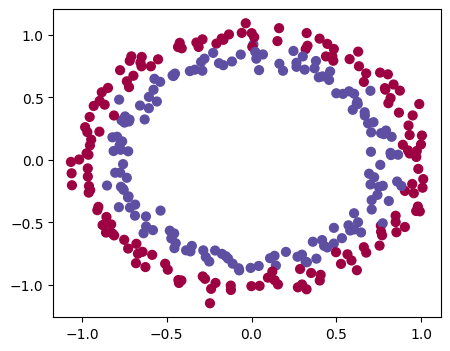

In [3]:
 train_X, train_Y, test_X, test_Y = load_dataset()

**NN architecture: Input layer -> 5 units relu -> 2 units relu -> 1 unit sigmoid.**

In [4]:
# Define neurons per layer 
layers_dims = [train_X.shape[0], 5, 2, 1]

Cost after iteration 0: 0.7008426093553071
Cost after iteration 10000: 0.05591037490849404
Cost after iteration 20000: 0.04754765185212285


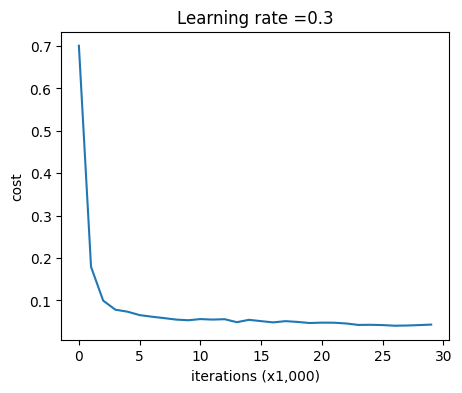

In [8]:
parameters, grads, costs = model(train_X, train_Y, layers_dims, learning_rate = 0.3)

In [9]:
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters, forward_propagation)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters, forward_propagation)

On the training set:
Accuracy: 0.9866666666666667
On the test set:
Accuracy: 0.9866666666666667


Data already fits pretty well, with slight overfitting.  
- Note that behaviour of nn may vary a little due to random initalization of parameters.

In [10]:
difference = gradient_checking(train_X, train_Y, 
                               parameters, 
                               forward_propagation, 
                               backward_propagation,
                               cost_function= 'crossentropy_cost',                               
                              )

Your backward propagation works perfectly fine! difference = 5.3328198700630545e-08


Note that this number may fluctuate due to random initialization of weights.

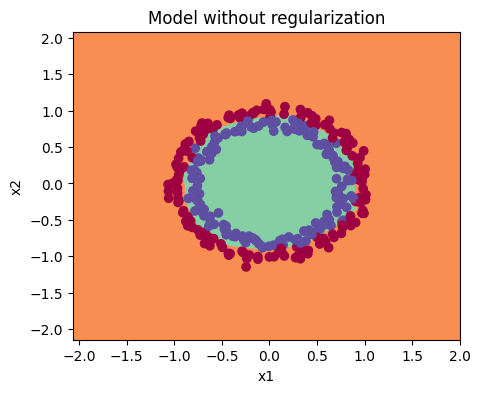

In [11]:
plt.title("Model without regularization")
axes = plt.gca()
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Add regularization

Cost after iteration 0: 0.6922681743809496
Cost after iteration 10000: 0.05427203477199817
Cost after iteration 20000: 0.047508496908098344


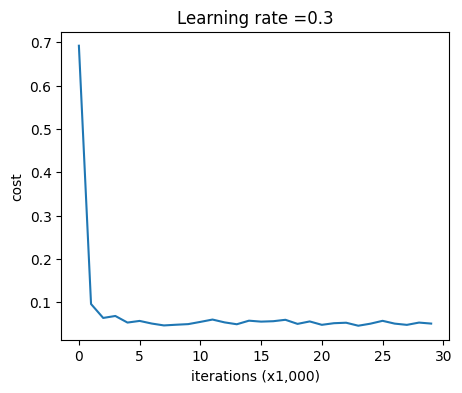

In [15]:
l2_parameters, l2_grads, costs = model(train_X, train_Y, layers_dims, learning_rate = 0.3, lambd=0.01)    

In [16]:
print ("On the training set:")
predictions_train = predict(train_X, train_Y, l2_parameters, forward_propagation)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, l2_parameters, forward_propagation)

On the training set:
Accuracy: 0.98
On the test set:
Accuracy: 0.9833333333333333


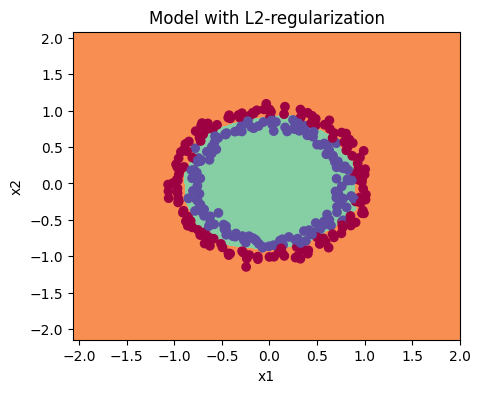

In [17]:
plt.title("Model with L2-regularization")
axes = plt.gca()
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Tune lambd to initialized weights. (try different values for best performance).

#### gradient checking for L2 regularization

In [18]:
difference = gradient_checking(train_X, train_Y, 
                               l2_parameters, 
                               forward_propagation, 
                               partial(L2_backpropagation, lambd=0.05),
                               backprop_args={'lambd': 0.05},
                               cost_function= 'l2_cost',
                               cost_args = {'lambd': 0.05}
                            )

Your backward propagation works perfectly fine! difference = 3.4558183412945065e-08


### Add dropout

Cost after iteration 0: 0.7653273639850376
Cost after iteration 10000: 0.4758200467470985
Cost after iteration 20000: 0.44982234272627525


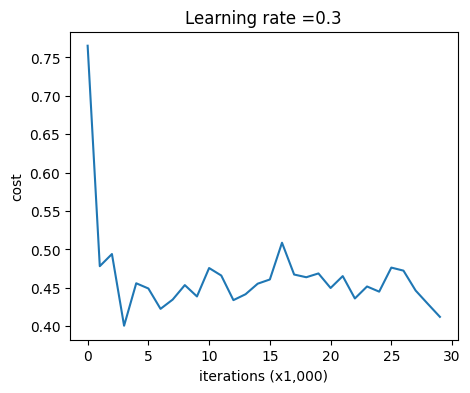

In [42]:
d_parameters, d_grads, costs = model(train_X, train_Y, layers_dims, keep_prob=0.8)    

### Check backpropagation by switching off dropout

In [44]:
difference = gradient_checking(train_X, train_Y, 
                               d_parameters, 
                               forward_propagation, 
                               backward_propagation,
                               forwardprop_args={'keep_prob':0.0},
                            backprop_args = {'keep_prob':0.0},
                               cost_function= 'crossentropy_cost',                               
                              )

Your backward propagation works perfectly fine! difference = 1.0738153051472247e-08
